In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 디버깅 모듈 설치
import pdb

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
# Hyper Parameter 지정
input_size = 3072 # 입력값이  32*32*3
hidden_size = 1500 # hidden layer의 unit 수
num_classes = 10 # 카테고리 개수, 딥러닝 결과가 10개 나온다.손글씨의 분류는 10개 / 최종적으로는 10개가 나와야 한다. 그림
num_epochs = 24
batch_size = 100 # 이미지가 아니고 크기가 크지 않은 모델에서는 굳이 쓰일 필요가 없다.
learning_rate = 0.001

# 데이터셋 로딩 -- 2번에 걸쳐서 로딩
# 1단계 - 물리적인 위치에 데이터 저장. 다운로드(training / test)
# train_dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
# test_dataset
test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                           train=False,
                                           transform=transforms.ToTensor())

# 2단계 - 네트워크에 100개씩 잘라서 로드함
# 2 step. DataLoader. BatchSize를 이용함.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle=False)

print('1',train_dataset)
print('2',test_dataset)
print('3',train_loader)

Files already downloaded and verified
1 Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()
2 Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()
3 <torch.utils.data.dataloader.DataLoader object at 0x7fe69a8bda90>


# Convolution NeuralNet Model 생성

In [ ]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNet, self).__init__()

    self.layer1 =nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=5, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU())
    
    self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=5, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer5 = nn.Linear(8*8*64, num_classes)

  def forward(self, x):

    #pdb.set_teace() # 2
     out = self.layer1(x)
     out = self.layer2(out)
     out = self.layer3(out)
     out = self.layer4(out)
     out = out.reshape(out.size(0),-1)
     out = self.layer5(out)

     return out

In [ ]:
model = ConvNet(num_classes).to(device)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_step = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # pdb.set_trace() # 2
    '''
    l(L)로 시작, q(Q)로 종료
    
    '''

    outputs = model(images).to(device)

    # pdb.set_trace() # 3


    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())
    
    if (i+1) % 100 == 0:
       print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/24], Step [100/500], Loss: 1.2767
Epoch [1/24], Step [200/500], Loss: 1.4006
Epoch [1/24], Step [300/500], Loss: 1.3927
Epoch [1/24], Step [400/500], Loss: 1.1491
Epoch [1/24], Step [500/500], Loss: 0.9176
Epoch [2/24], Step [100/500], Loss: 0.9539
Epoch [2/24], Step [200/500], Loss: 0.9569
Epoch [2/24], Step [300/500], Loss: 0.9461
Epoch [2/24], Step [400/500], Loss: 1.0931
Epoch [2/24], Step [500/500], Loss: 1.1101
Epoch [3/24], Step [100/500], Loss: 0.9136
Epoch [3/24], Step [200/500], Loss: 0.7955
Epoch [3/24], Step [300/500], Loss: 0.7531
Epoch [3/24], Step [400/500], Loss: 0.9429
Epoch [3/24], Step [500/500], Loss: 0.7638
Epoch [4/24], Step [100/500], Loss: 0.5818
Epoch [4/24], Step [200/500], Loss: 0.8016
Epoch [4/24], Step [300/500], Loss: 0.7484
Epoch [4/24], Step [400/500], Loss: 0.7395
Epoch [4/24], Step [500/500], Loss: 0.6236
Epoch [5/24], Step [100/500], Loss: 0.7939
Epoch [5/24], Step [200/500], Loss: 0.8457
Epoch [5/24], Step [300/500], Loss: 0.9058
Epoch [5/24

In [ ]:
model.eval()

accuracy_list = []

with torch.no_grad(): # 실제로 학습할 필요가 없으면 no.grad()구문을 넣어준다.
    correct = 0
    total = 0
    for images, labels in test_loader: # 인덱스를 굳이 안받아도 되니깐 enumeratorr가 빠졌다.
        images = images.to(device) #한줄로 죽 펼친 다음에 입력받아서
        labels = labels.to(device) # 라벨도 마찬가지로
        outputs = model(images) #모델에 넣고
        _, predicted = torch.max(outputs.data, 1)
        # total은 푼 문제, correct는 맞춘 문제수..이런식으로 카운팅이 들어간다
     
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print('Test Accuracy of the model: {} %'.format(accuracy))
        
        accuracy_list.append(accuracy)


Test Accuracy of the model: 80.0 %
Test Accuracy of the model: 77.5 %
Test Accuracy of the model: 74.66666666666667 %
Test Accuracy of the model: 73.25 %
Test Accuracy of the model: 71.2 %
Test Accuracy of the model: 72.5 %
Test Accuracy of the model: 72.14285714285714 %
Test Accuracy of the model: 72.375 %
Test Accuracy of the model: 72.88888888888889 %
Test Accuracy of the model: 72.6 %
Test Accuracy of the model: 71.9090909090909 %
Test Accuracy of the model: 72.16666666666667 %
Test Accuracy of the model: 72.3076923076923 %
Test Accuracy of the model: 72.35714285714286 %
Test Accuracy of the model: 72.53333333333333 %
Test Accuracy of the model: 72.5625 %
Test Accuracy of the model: 72.94117647058823 %
Test Accuracy of the model: 72.72222222222223 %
Test Accuracy of the model: 72.89473684210526 %
Test Accuracy of the model: 72.45 %
Test Accuracy of the model: 72.33333333333333 %
Test Accuracy of the model: 72.54545454545455 %
Test Accuracy of the model: 72.78260869565217 %
Test Acc

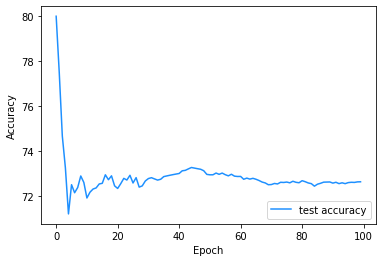

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(accuracy_list,
         label='test accuracy',
         c='dodgerblue')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# # Hyper Parameter 지정
# input_size = 3072 # 입력값이  32*32*3
# hidden_size = 1500 # hidden layer의 unit 수
# num_classes = 10 # 카테고리 개수, 딥러닝 결과가 10개 나온다.손글씨의 분류는 10개 / 최종적으로는 10개가 나와야 한다. 그림
# num_epochs = 24
# batch_size = 100 # 이미지가 아니고 크기가 크지 않은 모델에서는 굳이 쓰일 필요가 없다.
# learning_rate = 0.001

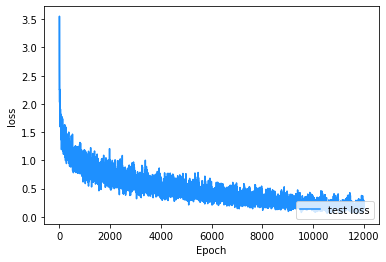

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(loss_list,
         label='test loss',
         c='dodgerblue')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()


# # Hyper Parameter 지정
# input_size = 3072 # 입력값이  32*32*3
# hidden_size = 1500 # hidden layer의 unit 수
# num_classes = 10 # 카테고리 개수, 딥러닝 결과가 10개 나온다.손글씨의 분류는 10개 / 최종적으로는 10개가 나와야 한다. 그림
# num_epochs = 24
# batch_size = 100 # 이미지가 아니고 크기가 크지 않은 모델에서는 굳이 쓰일 필요가 없다.
# learning_rate = 0.001